<a href="https://colab.research.google.com/github/pablex72/vi-phenology-analysis-/blob/main/FINAL_FINAL_for_Results_4_FARMS_IN_ONE_EOS_SOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

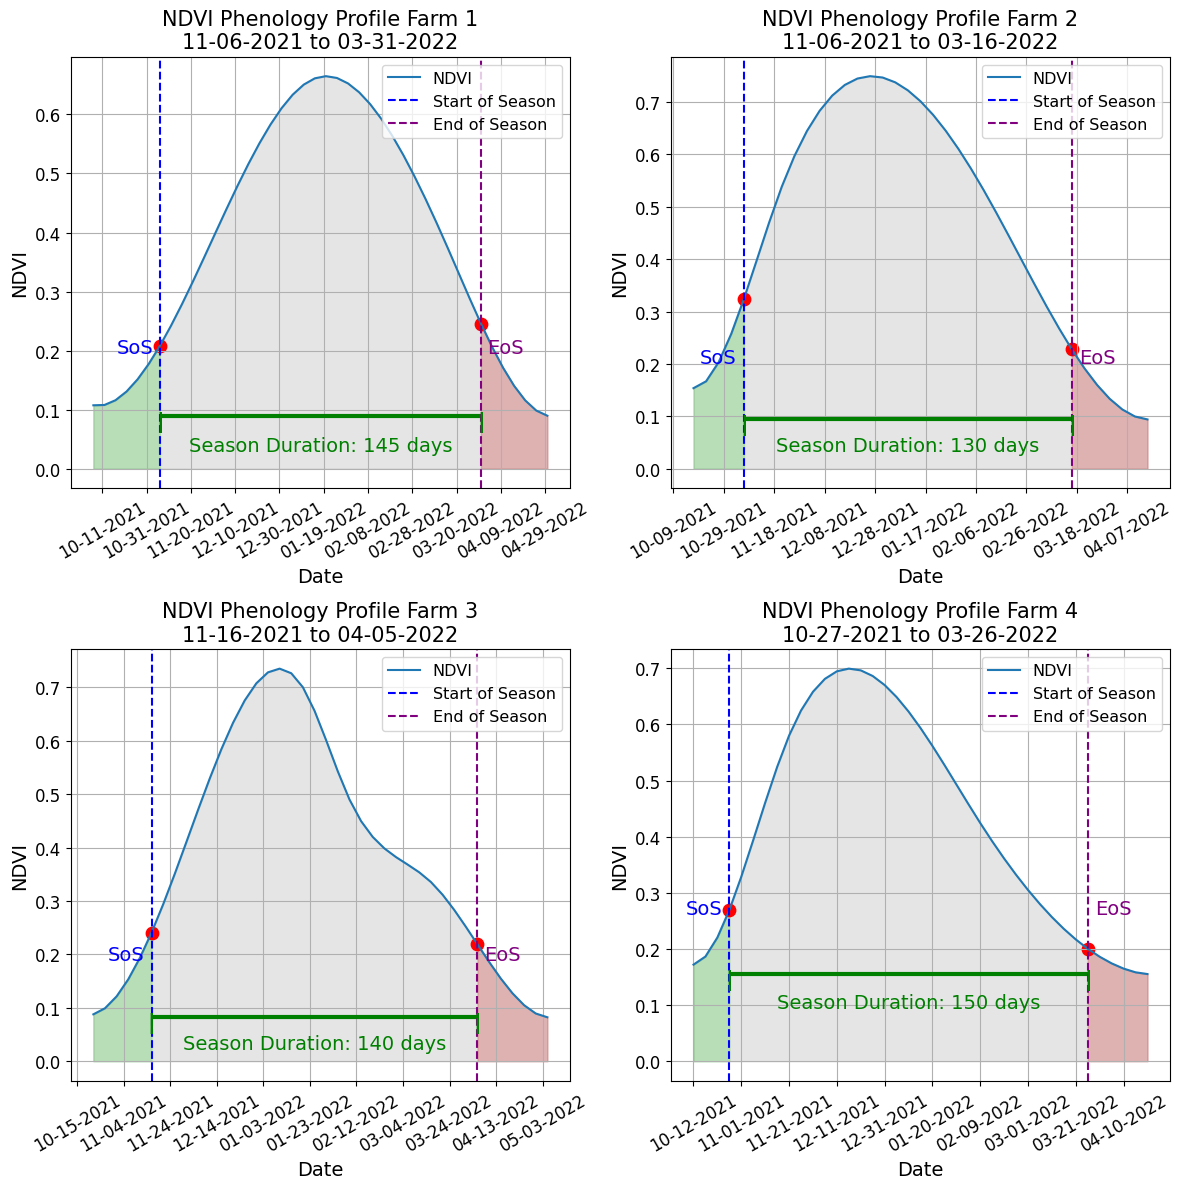

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import date2num, DateFormatter, DayLocator
import pandas as pd

# List of CSV files
csv_files = ['/content/one_season_farm1.csv', '/content/one_season_farm2.csv', '/content/one_season_farm3.csv', '/content/one_season_farm4.csv']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, csv_file in enumerate(csv_files):
    # Load data from a CSV file
    data = pd.read_csv(csv_file)

    # Extract dates and values from the DataFrame
    dates = data['Date'].tolist()
    values = data['NDVI'].tolist()

    # Calculate the total area under the curve
    total_area = np.trapz(values, dx=1)

    # Calculate the target areas (5% and 95% of the total area)
    target_area_5_percent = 0.05 * total_area
    target_area_95_percent = 0.95 * total_area

    # Initialize variables to keep track of accumulated area
    accumulated_area = 0
    beginning_point = None
    ending_point = None

    # Iterate through the data points to find the desired points
    for j in range(len(dates)):
        accumulated_area += values[j]
        if accumulated_area >= target_area_5_percent and beginning_point is None:
            beginning_point = (dates[j], values[j])

        if accumulated_area >= target_area_95_percent:
            ending_point = (dates[j], values[j])
            break

    # Convert the beginning and ending point dates to datetime objects
    beginning_point_date = datetime.strptime(beginning_point[0], "%m/%d/%Y")
    ending_point_date = datetime.strptime(ending_point[0], "%m/%d/%Y")

    # Calculate the duration of the season
    season_duration = (ending_point_date - beginning_point_date).days

    # Convert dates to datetime objects
    date_objects = [datetime.strptime(date, "%m/%d/%Y") for date in dates]

    # Plot the curve on the corresponding subplot
    ax = axes[i]

    # Plot the curve
    ax.plot(date_objects, values, label="NDVI")

    # Highlight the area under the curve up to the 5% mark
    ax.fill_between(date_objects, 0, values, where=[d <= beginning_point_date for d in date_objects], color='lightgreen', alpha=0.5)

    # Highlight the area under the curve up to the 95% mark
    ax.fill_between(date_objects, 0, values, where=[d >= ending_point_date for d in date_objects], color='lightcoral', alpha=0.5)

    # Highlight the rest of the area under the curve
    ax.fill_between(date_objects, 0, values, where=[True] * len(date_objects), color='gray', alpha=0.2)

    # Highlight the beginning and ending points
    ax.scatter(beginning_point_date, beginning_point[1], color='red', s=80)
    ax.scatter(ending_point_date, ending_point[1], color='red', s=80)

    # Season Duration highlighted Text
    season_duration_text = f"Season Duration: {season_duration} days"
    season_duration_text_position = (date2num(beginning_point_date) + date2num(ending_point_date)) / 2
    ax.text(season_duration_text_position, min(values) - 0.05, season_duration_text, color='green', fontsize=14, va='center', ha='center')

    # Add horizontal lines to highlight the seasonal duration
    ax.hlines(y=min(values), xmin=beginning_point_date, xmax=ending_point_date, color='green', linewidth=3, alpha=1)

    # Add text at the beginning of the line
    ax.text(date2num(beginning_point_date), min(values) - 0.01, "|", color='green', fontsize=15, va='center', ha='center', weight='bold')

    # Add text at the end of the line
    ax.text(date2num(ending_point_date), min(values) - 0.01, "|", color='green', fontsize=15, va='center', ha='center', weight='bold')

    # Add vertical lines at the start and end of the season
    ax.axvline(x=beginning_point_date, color='blue', linestyle='--', label='Start of Season')
    ax.axvline(x=ending_point_date, color='purple', linestyle='--', label='End of Season')

    # Add text and arrows for Start of Season
    ax.annotate('SoS', xy=(date2num(beginning_point_date), beginning_point[1]), xytext=(date2num(beginning_point_date) - 3, min(values) + 0.1),
                color='blue', ha='right', va='bottom', fontsize=14)

    # Add text and arrows for End of Season
    ax.annotate('EoS', xy=(date2num(ending_point_date), ending_point[1]), xytext=(date2num(ending_point_date) + 3, min(values) + 0.1),
                color='purple', ha='left', va='bottom', fontsize=14)

    # Set x-axis ticks to match the data dates and show every 15 days
    ax.xaxis.set_major_locator(DayLocator(interval=20))
    ax.xaxis.set_major_formatter(DateFormatter('%m-%d-%Y'))

    # Increase font size of x-axis and y-axis labels
    ax.set_xlabel("Date", fontsize=14)
    ax.set_ylabel("NDVI", fontsize=14)

    # Increase font size of x-axis and y-axis tick labels
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='x', rotation=30)
    # Set labels and title
    ax.set_title(f"NDVI Seasonal Parameters - {i+1}", fontsize=15)
    ax.set_title(f"NDVI Phenology Profile Farm {i+1}\n{beginning_point_date.strftime('%m-%d-%Y')} to {ending_point_date.strftime('%m-%d-%Y')}", fontsize=15)

    # Add a legend
    ax.legend(prop={"size": 11.5}, loc="upper right")

    ax.grid()

plt.tight_layout()
plt.show()
